In [ ]:
# import cv2
import gym as gym
from gym import spaces
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np
import optuna

## Tablular Method - Double Q Learning

### For Deterministic Environment

In [ ]:
env = SquirrelPet()
epsilon = 1.0  
epsilon_min = 0.01  
gamma = 0.95 
alpha = 0.15 
decay_rate = 0.995  
total_episodes = 1000
max_timestamp = 10

qt1 = np.zeros((env.obs_space.n, env.action_space.n))  # Q-table 1 initialization
qt2 = np.zeros((env.obs_space.n, env.action_space.n))  # Q-table 2 initialization

rewards_epi = []
epsilon_values = []
steps_per_episode = []
penalties_per_episode = []

final_state = None

for episode in range(total_episodes):
    state, _ = env.reset()
    state_index = env.obs_space_to_index(state)
    total_rewards = 0
    total_steps = 0

    while True:
        total_steps += 1
        action = env.action_space.sample() if np.random.uniform(0, 1) < epsilon else np.argmax((qt1[state_index] + qt2[state_index]) / 2)
        next_state, reward, terminated, truncated, _ = env.step(action)
        next_strt_idx = env.obs_space_to_index(next_state)
        if np.random.uniform(0, 1) < 0.5:
            qt1[state_index, action] += alpha * (reward + gamma * qt2[next_strt_idx, np.argmax(qt1[next_strt_idx])] - qt1[state_index, action])
        else:
            qt2[state_index, action] += alpha * (reward + gamma * qt1[next_strt_idx, np.argmax(qt2[next_strt_idx])] - qt2[state_index, action])
        state_index = next_strt_idx
        total_rewards += reward
        if terminated or truncated or total_steps >= max_timestamp:
            break

    penalties_per_episode.append(env.get_penalty_count())
    if (episode + 1) % 100 == 0:
        print(f"Episode: {episode + 1}")
        print("Q-table 1:")
        print(qt1)
        print("Q-table 2:")
        print(qt2)
        avg_penalty = np.mean(penalties_per_episode[-100:])
        print(f"Average Penalties in Last 100 Episodes: {avg_penalty}")

    epsilon = max(epsilon_min, epsilon * decay_rate)
    epsilon_values.append(epsilon)
    rewards_epi.append(total_rewards)
    steps_per_episode.append(total_steps)

    if (episode + 1) % 100 == 0:
        average_steps = np.mean(steps_per_episode[-100:])
        print(f"Episode: {episode + 1}, Average Steps: {average_steps}")

    if episode == total_episodes - 1:
        final_state = env.state

Episode: 100
Q-table 1:
[[122.55248351  94.92371725 105.15089081  95.35365562]
 [163.27454864  51.35314372  40.72800624  48.51260594]
 [ 32.21309189  16.21186432 107.13880473  51.01106218]
 [  0.           0.           0.           0.        ]
 [  4.43409301  55.3868515  170.63226209  46.01050564]
 [  0.           0.           0.           0.        ]
 [ 38.32976145   9.83198341  26.81952025 145.43183723]
 [  0.         104.58452184   6.6085708    0.67415526]
 [  4.48514774  36.26191747   8.26383089  -2.51883586]
 [  9.27443927 116.2712875   15.32975199  -1.48074017]
 [  0.           0.           0.           0.        ]
 [ 17.10569831   0.           5.26354079   0.64031147]
 [  0.           0.           0.           0.        ]
 [ -1.929375    22.07472977   1.5         -5.59962743]
 [ -0.75        25.91989069   0.           0.        ]
 [  0.           0.           0.           0.        ]]
Q-table 2:
[[107.26752189 107.18804793 108.52705895 115.5309421 ]
 [167.36888698  80.00109886  

In [ ]:
# import pickle

# # Assuming the above loop has been executed and qt1, qt2, rewards_epi, epsilon_values, steps_per_episode, and penalties_per_episode are populated

# # Creating a dictionary to hold everything
# data_to_save = {
#     "qt1": qt1,
#     "qt2": qt2,
#     "rewards_epi": rewards_epi,
#     "epsilon_values": epsilon_values,
#     "steps_per_episode": steps_per_episode,
#     "penalties_per_episode": penalties_per_episode,
#     "final_state": final_state
# }

# # Saving to a pickle file
# with open('q_tables_and_stats.pkl', 'wb') as f:
#     pickle.dump(data_to_save, f)

# print("Data saved to q_tables_and_stats.pkl")


In [ ]:
print("Trained Q-table 1:")
print(qt1)
print("Trained Q-table 2:")
print(qt2)

Trained Q-table 1:
[[7.57388194e+02 6.45217576e+02 6.44586651e+02 6.97123934e+02]
 [7.45513679e+02 1.02793380e+02 6.46164039e+01 8.31395369e+01]
 [3.22130919e+01 2.76024502e+01 1.92595028e+02 1.03917647e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.56299744e+02 4.76919479e+02 7.96185418e+02 3.28278729e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.76818616e+02 3.20987791e+01 7.20284677e+01 7.05372533e+02]
 [8.73768121e+00 2.11950670e+02 1.62869608e+01 1.46209894e+01]
 [9.24711706e+01 2.25172372e+02 7.04582676e+02 1.80755358e+02]
 [5.60981029e+02 7.95238533e+02 6.39423367e+02 6.15517290e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.64874105e+02 1.59774648e+01 5.26354079e+00 6.40311472e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.22692618e+01 5.49132842e+02 4.78227647e+01 1.31440463e+02]
 [1.25192634e+02 6.00731827e+02 1.30246258e+02 1.44680340e+02]
 [0.00000000e+00 0.00000000e+00 0.00

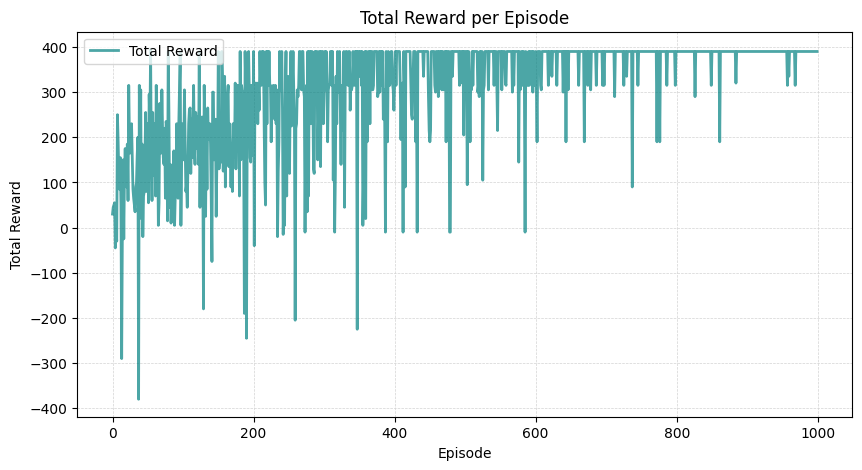

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(rewards_epi, color='Teal', linestyle='-', linewidth=2, alpha=0.7, label='Total Reward')
plt.title('Total Reward per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray')
plt.legend(loc='upper left')
plt.show()

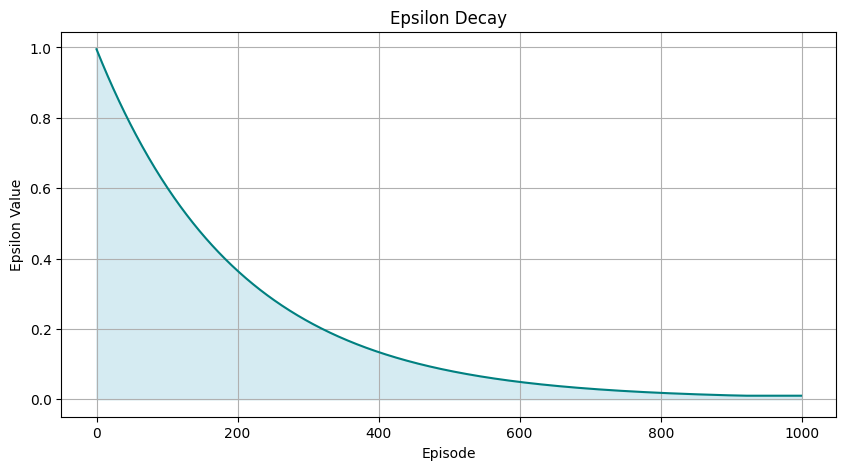

In [ ]:

plt.figure(figsize=(10, 5))
plt.plot(epsilon_values, color='Teal', label='Decay')
plt.title('Epsilon Decay')
plt.xlabel('Episode')
plt.ylabel('Epsilon Value')
plt.fill_between(range(len(epsilon_values)), epsilon_values, color="lightblue", alpha=0.5)
plt.grid(True)
plt.show()

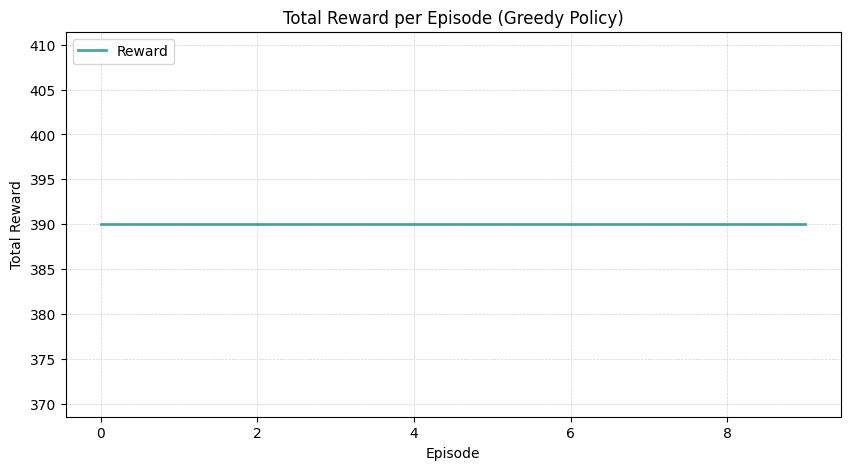

In [ ]:
greedy_rewards = []
for _ in range(10):
    state, _ = env.reset()
    state_index = env.obs_space_to_index(state)
    total_greedy_rewards = 0
    while True:
        action = np.argmax((qt1[state_index] + qt2[state_index]) / 2)
        next_state, reward, terminated, truncated, _ = env.step(action)
        state_index = env.obs_space_to_index(next_state)
        total_greedy_rewards += reward

        if terminated or truncated:
            break

    greedy_rewards.append(total_greedy_rewards)


plt.figure(figsize=(10, 5))
plt.plot(greedy_rewards, color='Teal', linestyle='-', linewidth=2, alpha=0.7, label='Reward')
plt.title('Total Reward per Episode (Greedy Policy)')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray')
plt.legend(loc='upper left')
plt.show()